### Problem 2 (Quantile Regression)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("birthSample_1000.txt")
df = df.set_index(df.columns[0])

In [3]:
df.head()

,MaritalStatus,PrenatalCare,Male,Weight
Unnamed: 0,,,,
3971,1,1,1,2983
5717,1,1,0,3471
1325,1,1,1,3818
3265,0,0,0,3204
8233,0,1,1,3600


In [4]:
df.nunique()

MaritalStatus      2
PrenatalCare       2
Male               2
Weight           472
dtype: int64

In [5]:
n = len(df)

In [6]:
y = np.asarray(df['Weight'])
X = np.asarray(df[['MaritalStatus','Male','PrenatalCare']])

In [7]:
ys = y - np.mean(y)
ys = ys / np.std(y)

Xs = X - X.mean(axis=0)
Xs = Xs * np.std(Xs, axis=0)**-1

Use this helper function to print out the coefficents of the intercept and weight vector.

In [8]:
def print_coefs(results):
    print('Intercept coefficient:\t', results.intercept_)
    for i in range(len(df.columns[:-1])):
        print('Coefficient of', df.columns[i], ':\t', results.coef_[i])

### a) Fit a least squares regression 
Use least squares to predict birth weight using baby's gender, mother’s marital status, and prenatal care in the first trimester as features. (Include an offset.) Interpret the coefficients that you find. What do they mean about the relationship between each variable and birth weight?

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(Xs, ys)

In [11]:
print_coefs(reg)

Intercept coefficient:	 -2.605111389991491e-16
Coefficient of MaritalStatus :	 0.1239460327812537
Coefficient of PrenatalCare :	 0.07146270484693734
Coefficient of Male :	 0.07672786297953829


__Response__: All the coefficient are positive, meaning that there is a positive correlation between weight and each of the variables. The more positive the coefficient is, the stronger the positive correlation is. Thus, the coefficients tell me that a baby with MaritalStatus = 1 is likely to have a higher weight than a baby with MaritalStatus = 0. A baby with PrenatalCare = 1 is likely to have a higher weight than a baby with Prenatal = 0. A baby with Male = 1 is likely to have a higher weight than a baby with Male = 0. The correlation is stronger with MaritalStatus, less strong with Male, and least strong with Prenatal. The intercept coefficient is the value of the predicted scaled weigtht when all features are zero after scaling.

### b) Fit a quantile regression on the data with $q=0.05$ and $q=0.95$. What do these models predict, and how does it diﬀer from the prediction of the least squares regression? Compare these coeﬃcients to those you found in part a).

For this problem, use sklearn.linear_model.QuantileRegressor with a regularization coefficient of 0. 


In [12]:
from sklearn.linear_model import QuantileRegressor

In [13]:
qreg1 = QuantileRegressor(quantile = 0.05, alpha = 0).fit(Xs, ys)

In [14]:
print_coefs(qreg1)

Intercept coefficient:	 -1.507000266492195
Coefficient of MaritalStatus :	 0.3857792813135028
Coefficient of PrenatalCare :	 -0.006613470831668078
Coefficient of Male :	 0.1298019185059316


In [15]:
qreg2 = QuantileRegressor(quantile = 0.95, alpha = 0).fit(Xs, ys)

In [16]:
print_coefs(qreg2)

Intercept coefficient:	 1.4499106153280765
Coefficient of MaritalStatus :	 0.051645271937252435
Coefficient of PrenatalCare :	 0.16755808876187328
Coefficient of Male :	 0.11072162200713098


__Response__:

### c) Fit quantile regressions for $q=0.05, 0.10, \cdots, 0.95$.
This step may take a while.

In [17]:
qs = np.arange(0.05, 0.96, 0.05)
coefs = np.zeros((19, 4))
for i in range(len(qs)):
    qreg = QuantileRegressor(quantile = qs[i], alpha = 0).fit(Xs, ys)
    for j in range(4):
        if j == 0:
            coefs[i, j] = qreg.intercept_
        else:
            coefs[i, j] = qreg.coef_[j-1]

In [18]:
qs

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [19]:
coefs[2]

array([-0.81891713,  0.09736404,  0.02591104,  0.0590472 ])

### d) Create an intercept plot that plots quantiles against the intercept coefficient from that quantile regression. Create coefficient plots for MaritalStatus, Male, and PrenatalCare coefficients.


In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Intercept')

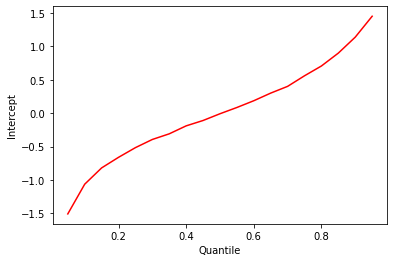

In [21]:
plt.plot(qs, coefs[:,0], 'r')
plt.xlabel('Quantile')
plt.ylabel('Intercept')

Text(0, 0.5, 'Coef for MaritalStatus')

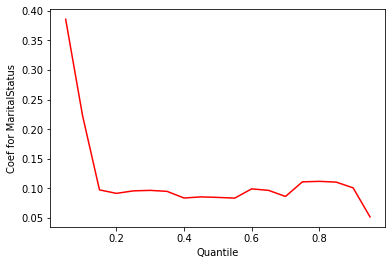

In [22]:
plt.plot(qs, coefs[:,1], 'r')
plt.xlabel('Quantile')
plt.ylabel('Coef for MaritalStatus')

Text(0, 0.5, 'Coef for PrenatalCare')

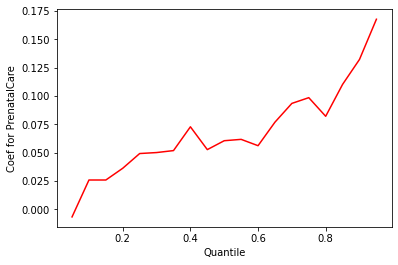

In [23]:
plt.plot(qs, coefs[:,2], 'r')
plt.xlabel('Quantile')
plt.ylabel('Coef for PrenatalCare')

Text(0, 0.5, 'Coef for Male')

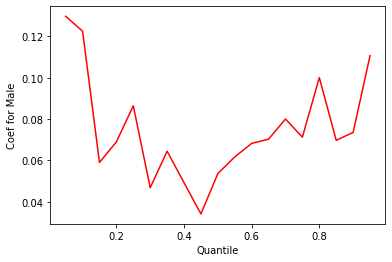

In [24]:
plt.plot(qs, coefs[:,3], 'r')
plt.xlabel('Quantile')
plt.ylabel('Coef for Male')

__Response__: 

### e) How should you interpret the intercepts of the quantile regressions?

__Response__: The intercepts of the quantile regression constantly increases as the quantile parameter increases. This is because as the quantile parameter increases, we care more about examples on which our model's prediction is lower than the actual weight. Thus our predictions tend to be higher for regressors with a higher quantile parameter, thus having a larger intercept.

### f) What does the coefficient plot tell you about the effect of prenatal care for infants with low birth weight compared to those with average birth weights?

__Response__: the effect of prenatal care for infants with low birth weight is smaller compared to those with average birth weights.